In [1]:
#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
from IPython.display import HTML, display
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:40:32) [GCC 12.3.0]
pandas version: 2.1.4
matplotlib version: 3.7.4
NumPy version: 1.24.3
SciPy version: 1.7.3
IPython version: 8.14.0


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


scikit-learn version: 1.2.2
-------------------------


In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
sns.set_style('darkgrid')
pylab.rcParams['figure.figsize'] = 12,8

In [3]:
TRAIN_FILENAME = "/kaggle/input/playground-series-s3e26/train.csv"
TEST_FILENAME = "/kaggle/input/playground-series-s3e26/test.csv"

In [4]:
train_data = pd.read_csv(TRAIN_FILENAME)
print(train_data.shape)
print('-'*50)

test_data = pd.read_csv(TEST_FILENAME)
print(test_data.shape)
print('-'*50)

(7905, 20)
--------------------------------------------------
(5271, 19)
--------------------------------------------------


In [5]:
print(train_data.info())
print('-'*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [6]:
print(test_data.info())
print('-'*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5271 non-null   int64  
 1   N_Days         5271 non-null   int64  
 2   Drug           5271 non-null   object 
 3   Age            5271 non-null   int64  
 4   Sex            5271 non-null   object 
 5   Ascites        5271 non-null   object 
 6   Hepatomegaly   5271 non-null   object 
 7   Spiders        5271 non-null   object 
 8   Edema          5271 non-null   object 
 9   Bilirubin      5271 non-null   float64
 10  Cholesterol    5271 non-null   float64
 11  Albumin        5271 non-null   float64
 12  Copper         5271 non-null   float64
 13  Alk_Phos       5271 non-null   float64
 14  SGOT           5271 non-null   float64
 15  Tryglicerides  5271 non-null   float64
 16  Platelets      5271 non-null   float64
 17  Prothrombin    5271 non-null   float64
 18  Stage   

In [7]:
cols = train_data.columns.to_list()
print(cols)
train_data[cols].nunique()

['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status']


id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

In [8]:
cols = test_data.columns.to_list()
print(cols)
test_data[cols].nunique()

['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


id               5271
N_Days            409
Drug                2
Age               363
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         108
Cholesterol       222
Albumin           154
Copper            164
Alk_Phos          362
SGOT              195
Tryglicerides     155
Platelets         223
Prothrombin        47
Stage               4
dtype: int64

In [9]:
train_data.head()

id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0   0     999  D-penicillamine  21532   M       N            N       N     N   
1   1    2574          Placebo  19237   F       N            N       N     N   
2   2    3428          Placebo  13727   F       N            Y       Y     Y   
3   3    2576          Placebo  18460   F       N            N       N     N   
4   4     788          Placebo  16658   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        2.3        316.0     3.35   172.0    1601.0  179.80           63.0   
1        0.9        364.0     3.54    63.0    1440.0  134.85           88.0   
2        3.3        299.0     3.55   131.0    1029.0  119.35           50.0   
3        0.6        256.0     3.50    58.0    1653.0   71.30           96.0   
4        1.1        346.0     3.65    63.0    1181.0  125.55           96.0   

   Platelets  Prothrombin  Stage Status  
0      394.0          9.7    3.0      D  
1      361.0         11.0    3.0      C  
2      199.0         11.7    4.0      D  
3      269.0         10.7    3.0      C  
4      298.0         10.6    4.0      C

In [10]:
test_data.head()

id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0  7905    3839  D-penicillamine  19724   F       N            Y       N   
1  7906    2468  D-penicillamine  14975   F       N            N       N   
2  7907      51          Placebo  13149   F       N            Y       N   
3  7908    2330  D-penicillamine  20510   F       N            N       N   
4  7909    1615  D-penicillamine  21904   F       N            Y       N   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     N        1.2        546.0     3.37    65.0    1636.0  151.90   
1     N        1.1        660.0     4.22    94.0    1257.0  151.90   
2     Y        2.0        151.0     2.96    46.0     961.0   69.75   
3     N        0.6        293.0     3.85    40.0     554.0  125.55   
4     N        1.4        277.0     2.97   121.0    1110.0  125.00   

   Tryglicerides  Platelets  Prothrombin  Stage  
0           90.0      430.0         10.6    2.0  
1          155.0      227.0         10.0    2.0  
2          101.0      213.0         13.0    4.0  
3           56.0      270.0         10.6    2.0  
4          126.0      221.0          9.8    1.0

In [11]:
print('Train columns with null values:\n')
print(train_data.isnull().sum())

Train columns with null values:

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64


In [12]:
print('Test columns with null values:\n')
print(test_data.isnull().sum())

Test columns with null values:

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64


In [13]:
# Convert binary features
train_data['Sex'] = train_data['Sex'].map({'M': 1, 'F': 0})
train_data['Ascites'] = train_data['Ascites'].map({'Y': 1, 'N': 0})
train_data['Hepatomegaly'] = train_data['Hepatomegaly'].map({'Y': 1, 'N': 0})
train_data['Spiders'] = train_data['Spiders'].map({'Y': 1, 'N': 0})

# Display the modified DataFrame
print(train_data)

        id  N_Days             Drug    Age  Sex  Ascites  Hepatomegaly  \
0        0     999  D-penicillamine  21532    1        0             0   
1        1    2574          Placebo  19237    0        0             0   
2        2    3428          Placebo  13727    0        0             1   
3        3    2576          Placebo  18460    0        0             0   
4        4     788          Placebo  16658    0        0             1   
...    ...     ...              ...    ...  ...      ...           ...   
7900  7900    1166  D-penicillamine  16839    0        0             0   
7901  7901    1492          Placebo  17031    0        0             1   
7902  7902    1576  D-penicillamine  25873    0        0             0   
7903  7903    3584  D-penicillamine  22960    1        0             1   
7904  7904    1978  D-penicillamine  19237    0        0             0   

      Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0           0     N        2.3       

In [14]:
train_data

id  N_Days             Drug    Age  Sex  Ascites  Hepatomegaly  \
0        0     999  D-penicillamine  21532    1        0             0   
1        1    2574          Placebo  19237    0        0             0   
2        2    3428          Placebo  13727    0        0             1   
3        3    2576          Placebo  18460    0        0             0   
4        4     788          Placebo  16658    0        0             1   
...    ...     ...              ...    ...  ...      ...           ...   
7900  7900    1166  D-penicillamine  16839    0        0             0   
7901  7901    1492          Placebo  17031    0        0             1   
7902  7902    1576  D-penicillamine  25873    0        0             0   
7903  7903    3584  D-penicillamine  22960    1        0             1   
7904  7904    1978  D-penicillamine  19237    0        0             0   

      Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0           0     N        2.3        316.0     3.35   172.0    1601.0   
1           0     N        0.9        364.0     3.54    63.0    1440.0   
2           1     Y        3.3        299.0     3.55   131.0    1029.0   
3           0     N        0.6        256.0     3.50    58.0    1653.0   
4           0     N        1.1        346.0     3.65    63.0    1181.0   
...       ...   ...        ...          ...      ...     ...       ...   
7900        0     N        0.8        309.0     3.56    38.0    1629.0   
7901        0     N        0.9        260.0     3.43    62.0    1440.0   
7902        1     S        2.0        225.0     3.19    51.0     933.0   
7903        0     N        0.7        248.0     2.75    32.0    1003.0   
7904        0     N        0.7        256.0     3.23    22.0     645.0   

        SGOT  Tryglicerides  Platelets  Prothrombin  Stage Status  
0     179.80           63.0      394.0          9.7    3.0      D  
1     134.85           88.0      361.0         11.0    3.0      C  
2     119.35           50.0      199.0         11.7    4.0      D  
3      71.30           96.0      269.0         10.7    3.0      C  
4     125.55           96.0      298.0         10.6    4.0      C  
...      ...            ...        ...          ...    ...    ...  
7900   79.05          224.0      344.0          9.9    2.0      C  
7901  142.00           78.0      277.0         10.0    4.0      C  
7902   69.75           62.0      200.0         12.7    2.0      D  
7903   57.35          118.0      221.0         10.6    4.0      D  
7904   74.40           85.0      336.0         10.3    3.0      C  

[7905 rows x 20 columns]

In [15]:
# Apply one-hot encoding to the 'Edema' column
edema_dummies = pd.get_dummies(train_data['Edema'], prefix='Edema')

# Concatenate the new columns to the original DataFrame
train_data = pd.concat([train_data, edema_dummies], axis=1)

# Optionally, drop the original 'Edema' column if no longer needed
train_data = train_data.drop('Edema', axis=1)

In [16]:
# Convert the True/False values to 1/0
train_data['Edema_N'] = train_data['Edema_N'].astype(int)
train_data['Edema_Y'] = train_data['Edema_Y'].astype(int)
train_data['Edema_S'] = train_data['Edema_S'].astype(int)

# Now, the columns 'Edema_N', 'Edema_Y', and 'Edema_S' will have values 1 or 0 instead of True or False.

In [17]:
train_data

id  N_Days             Drug    Age  Sex  Ascites  Hepatomegaly  \
0        0     999  D-penicillamine  21532    1        0             0   
1        1    2574          Placebo  19237    0        0             0   
2        2    3428          Placebo  13727    0        0             1   
3        3    2576          Placebo  18460    0        0             0   
4        4     788          Placebo  16658    0        0             1   
...    ...     ...              ...    ...  ...      ...           ...   
7900  7900    1166  D-penicillamine  16839    0        0             0   
7901  7901    1492          Placebo  17031    0        0             1   
7902  7902    1576  D-penicillamine  25873    0        0             0   
7903  7903    3584  D-penicillamine  22960    1        0             1   
7904  7904    1978  D-penicillamine  19237    0        0             0   

      Spiders  Bilirubin  Cholesterol  ...  Alk_Phos    SGOT  Tryglicerides  \
0           0        2.3        316.0  ...    1601.0  179.80           63.0   
1           0        0.9        364.0  ...    1440.0  134.85           88.0   
2           1        3.3        299.0  ...    1029.0  119.35           50.0   
3           0        0.6        256.0  ...    1653.0   71.30           96.0   
4           0        1.1        346.0  ...    1181.0  125.55           96.0   
...       ...        ...          ...  ...       ...     ...            ...   
7900        0        0.8        309.0  ...    1629.0   79.05          224.0   
7901        0        0.9        260.0  ...    1440.0  142.00           78.0   
7902        1        2.0        225.0  ...     933.0   69.75           62.0   
7903        0        0.7        248.0  ...    1003.0   57.35          118.0   
7904        0        0.7        256.0  ...     645.0   74.40           85.0   

      Platelets  Prothrombin  Stage  Status  Edema_N Edema_S  Edema_Y  
0         394.0          9.7    3.0       D        1       0        0  
1         361.0         11.0    3.0       C        1       0        0  
2         199.0         11.7    4.0       D        0       0        1  
3         269.0         10.7    3.0       C        1       0        0  
4         298.0         10.6    4.0       C        1       0        0  
...         ...          ...    ...     ...      ...     ...      ...  
7900      344.0          9.9    2.0       C        1       0        0  
7901      277.0         10.0    4.0       C        1       0        0  
7902      200.0         12.7    2.0       D        0       1        0  
7903      221.0         10.6    4.0       D        1       0        0  
7904      336.0         10.3    3.0       C        1       0        0  

[7905 rows x 22 columns]

In [18]:
print(train_data)

        id  N_Days             Drug    Age  Sex  Ascites  Hepatomegaly  \
0        0     999  D-penicillamine  21532    1        0             0   
1        1    2574          Placebo  19237    0        0             0   
2        2    3428          Placebo  13727    0        0             1   
3        3    2576          Placebo  18460    0        0             0   
4        4     788          Placebo  16658    0        0             1   
...    ...     ...              ...    ...  ...      ...           ...   
7900  7900    1166  D-penicillamine  16839    0        0             0   
7901  7901    1492          Placebo  17031    0        0             1   
7902  7902    1576  D-penicillamine  25873    0        0             0   
7903  7903    3584  D-penicillamine  22960    1        0             1   
7904  7904    1978  D-penicillamine  19237    0        0             0   

      Spiders  Bilirubin  Cholesterol  ...  Alk_Phos    SGOT  Tryglicerides  \
0           0        2.3        

In [19]:
# Convert 'Drug' to binary format
# Assuming 'D-penicillamine' is the drug, map it to 1, and 'Placebo' to 0
train_data['Drug'] = train_data['Drug'].map({'D-penicillamine': 1, 'Placebo': 0})

# Now, the 'Drug' column will have values 1 (for D-penicillamine) or 0 (for Placebo)

In [20]:
train_data

id  N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  \
0        0     999     1  21532    1        0             0        0   
1        1    2574     0  19237    0        0             0        0   
2        2    3428     0  13727    0        0             1        1   
3        3    2576     0  18460    0        0             0        0   
4        4     788     0  16658    0        0             1        0   
...    ...     ...   ...    ...  ...      ...           ...      ...   
7900  7900    1166     1  16839    0        0             0        0   
7901  7901    1492     0  17031    0        0             1        0   
7902  7902    1576     1  25873    0        0             0        1   
7903  7903    3584     1  22960    1        0             1        0   
7904  7904    1978     1  19237    0        0             0        0   

      Bilirubin  Cholesterol  ...  Alk_Phos    SGOT  Tryglicerides  Platelets  \
0           2.3        316.0  ...    1601.0  179.80           63.0      394.0   
1           0.9        364.0  ...    1440.0  134.85           88.0      361.0   
2           3.3        299.0  ...    1029.0  119.35           50.0      199.0   
3           0.6        256.0  ...    1653.0   71.30           96.0      269.0   
4           1.1        346.0  ...    1181.0  125.55           96.0      298.0   
...         ...          ...  ...       ...     ...            ...        ...   
7900        0.8        309.0  ...    1629.0   79.05          224.0      344.0   
7901        0.9        260.0  ...    1440.0  142.00           78.0      277.0   
7902        2.0        225.0  ...     933.0   69.75           62.0      200.0   
7903        0.7        248.0  ...    1003.0   57.35          118.0      221.0   
7904        0.7        256.0  ...     645.0   74.40           85.0      336.0   

      Prothrombin  Stage  Status  Edema_N Edema_S  Edema_Y  
0             9.7    3.0       D        1       0        0  
1            11.0    3.0       C        1       0        0  
2            11.7    4.0       D        0       0        1  
3            10.7    3.0       C        1       0        0  
4            10.6    4.0       C        1       0        0  
...           ...    ...     ...      ...     ...      ...  
7900          9.9    2.0       C        1       0        0  
7901         10.0    4.0       C        1       0        0  
7902         12.7    2.0       D        0       1        0  
7903         10.6    4.0       D        1       0        0  
7904         10.3    3.0       C        1       0        0  

[7905 rows x 22 columns]

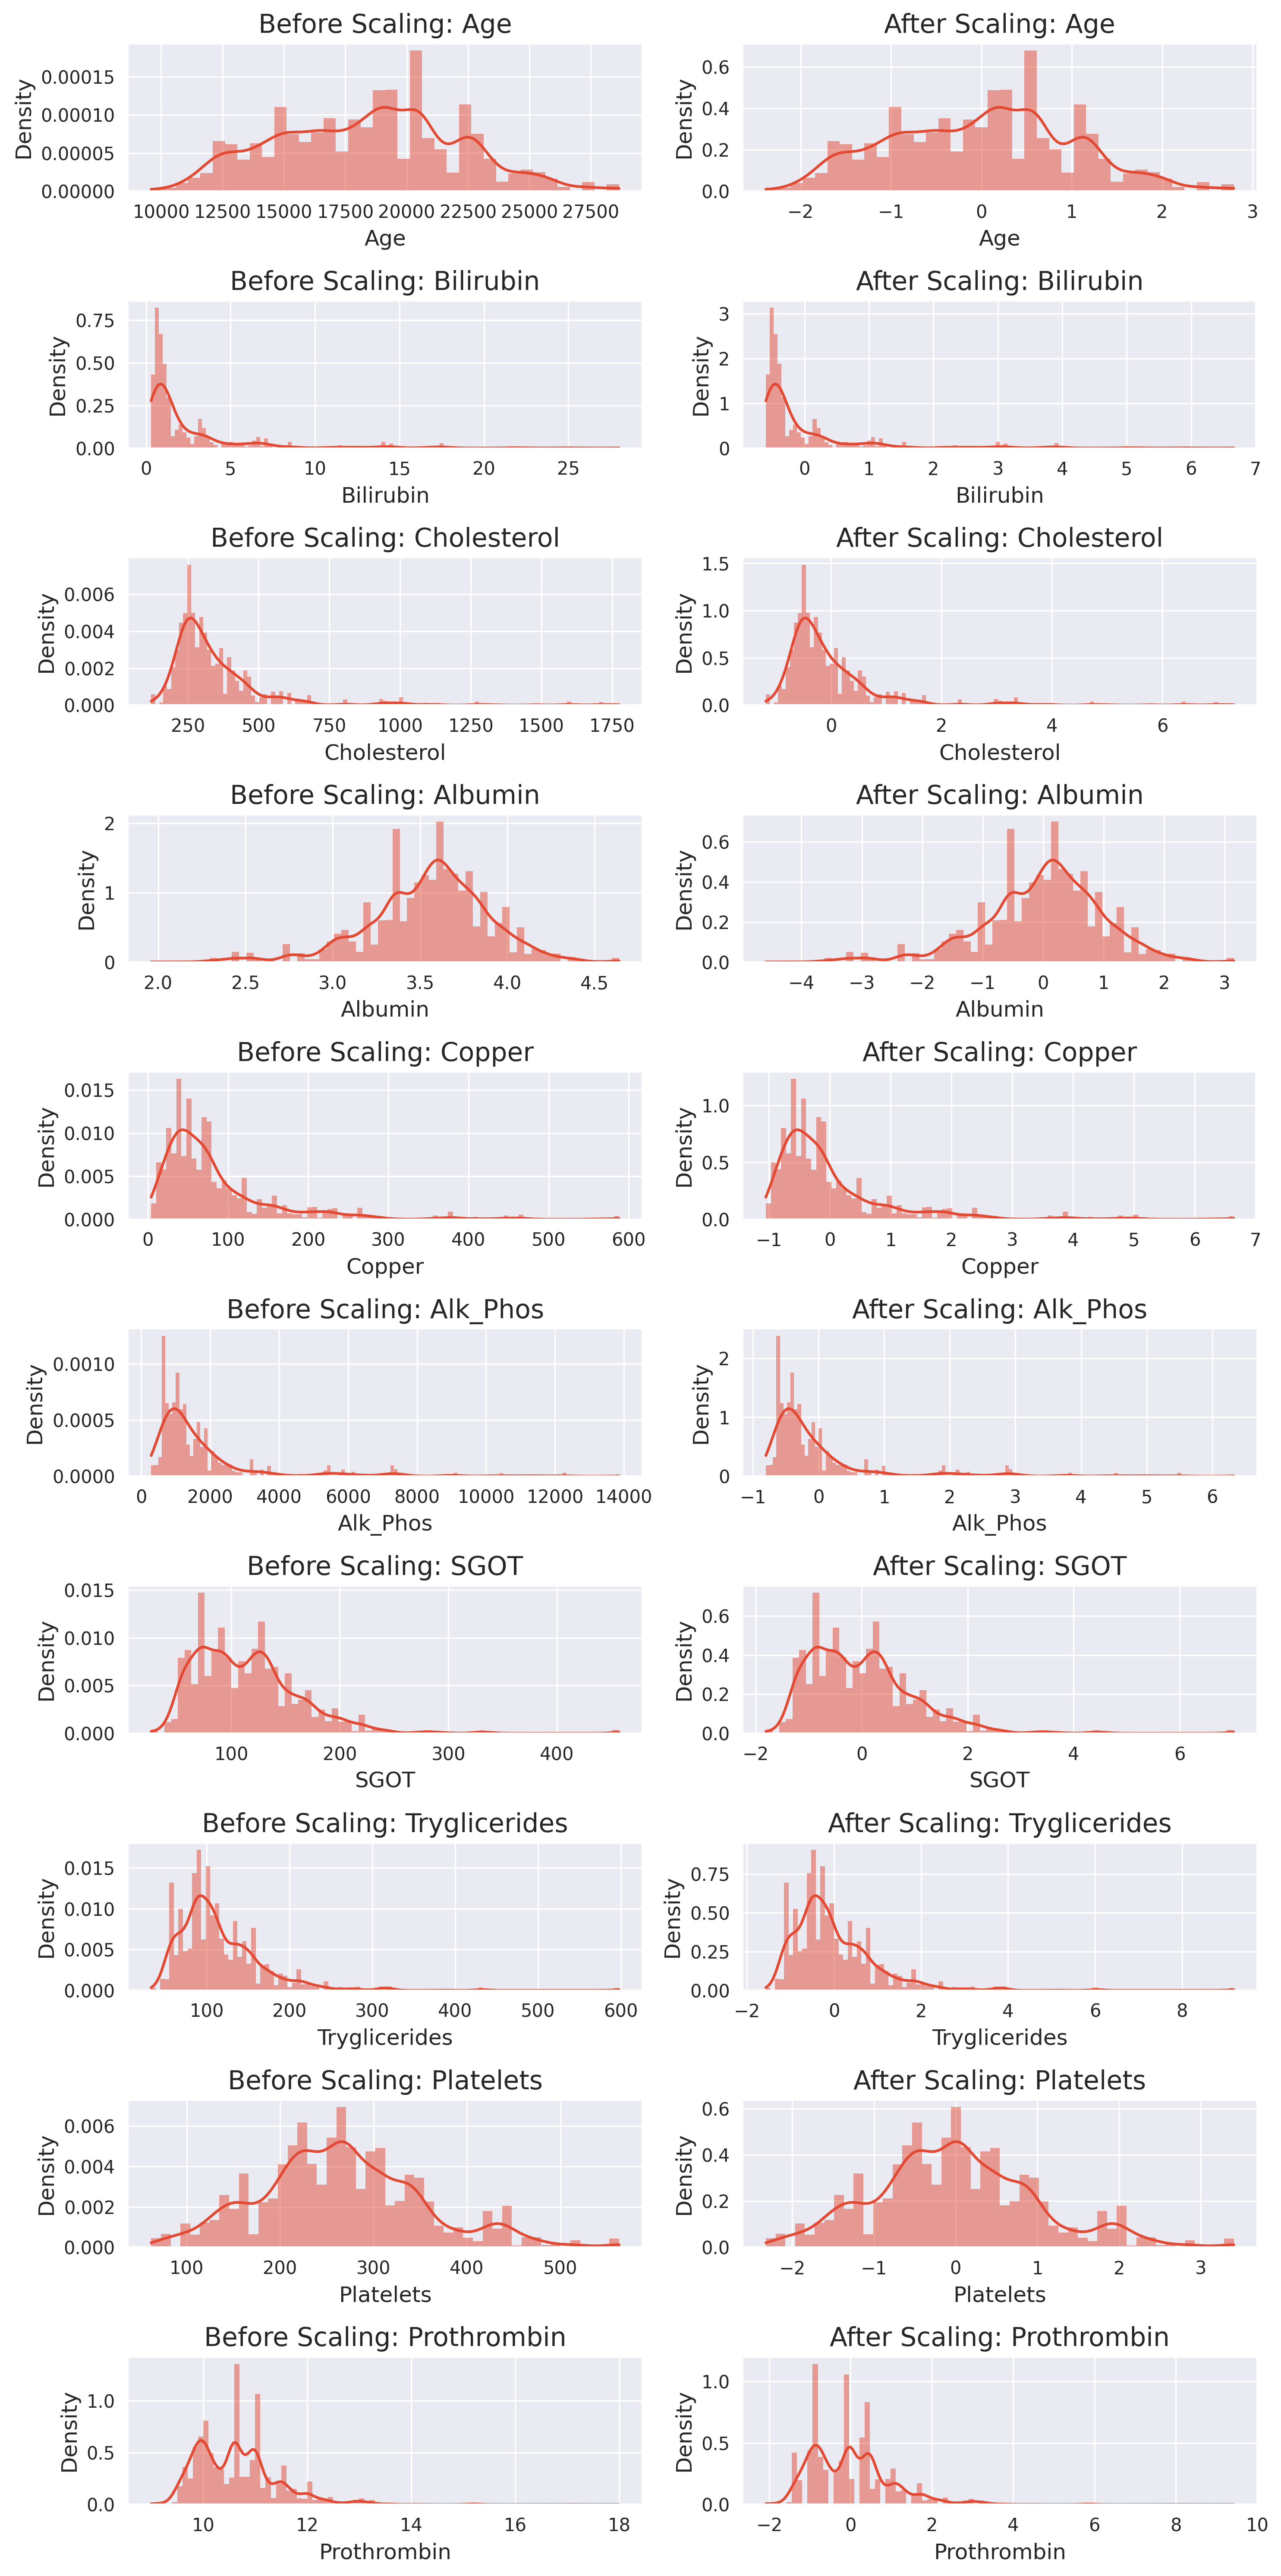

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

features_to_scale = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# Apply scaling
scaler = StandardScaler() # or MinMaxScaler
train_data_scaled = train_data.copy()
train_data_scaled[features_to_scale] = scaler.fit_transform(train_data_scaled[features_to_scale])

# Define the number of rows and columns for subplots
n_rows = len(features_to_scale)
n_cols = 2  # Two columns for before and after

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 2 * n_rows), dpi=300)

# Plot histograms
for i, feature in enumerate(features_to_scale):
    # Before scaling
    sns.histplot(train_data[feature], kde=True, stat="density", linewidth=0, ax=axes[i, 0])
    axes[i, 0].set_title(f'Before Scaling: {feature}')
    
    # After scaling
    sns.histplot(train_data_scaled[feature], kde=True, stat="density", linewidth=0, ax=axes[i, 1])
    axes[i, 1].set_title(f'After Scaling: {feature}')

# Adjust layout
plt.tight_layout()
plt.show()

In [22]:
train_data_scaled

id  N_Days  Drug       Age  Sex  Ascites  Hepatomegaly  Spiders  \
0        0     999     1  0.858448    1        0             0        0   
1        1    2574     0  0.234760    0        0             0        0   
2        2    3428     0 -1.262634    0        0             1        1   
3        3    2576     0  0.023603    0        0             0        0   
4        4     788     0 -0.466107    0        0             1        0   
...    ...     ...   ...       ...  ...      ...           ...      ...   
7900  7900    1166     1 -0.416919    0        0             0        0   
7901  7901    1492     0 -0.364741    0        0             1        0   
7902  7902    1576     1  2.038155    0        0             0        1   
7903  7903    3584     1  1.246520    1        0             1        0   
7904  7904    1978     1  0.234760    0        0             0        0   

      Bilirubin  Cholesterol  ...  Alk_Phos      SGOT  Tryglicerides  \
0     -0.077237    -0.176908  ... -0.113334  1.336304      -0.996442   
1     -0.444429     0.068784  ... -0.197909  0.414968      -0.520497   
2      0.185043    -0.263923  ... -0.413812  0.097266      -1.243933   
3     -0.523113    -0.484022  ... -0.086017 -0.887610      -0.368194   
4     -0.391973    -0.023351  ... -0.333965  0.224347      -0.368194   
...         ...          ...  ...       ...       ...            ...   
7900  -0.470657    -0.212738  ... -0.098625 -0.728759       2.068644   
7901  -0.444429    -0.463548  ... -0.197909  0.561521      -0.710875   
7902  -0.155921    -0.642698  ... -0.464242 -0.919380      -1.015479   
7903  -0.496885    -0.524971  ... -0.427470 -1.173542       0.050637   
7904  -0.496885    -0.484022  ... -0.615532 -0.824070      -0.577610   

      Platelets  Prothrombin  Stage  Status  Edema_N Edema_S  Edema_Y  
0      1.472341    -1.189049    3.0       D        1       0        0  
1      1.095026     0.474024    3.0       C        1       0        0  
2     -0.757248     1.369525    4.0       D        0       0        1  
3      0.043117     0.090238    3.0       C        1       0        0  
4      0.374697    -0.037691    4.0       C        1       0        0  
...         ...          ...    ...     ...      ...     ...      ...  
7900   0.900652    -0.933192    2.0       C        1       0        0  
7901   0.134588    -0.805263    4.0       C        1       0        0  
7902  -0.745814     2.648812    2.0       D        0       1        0  
7903  -0.505705    -0.037691    4.0       D        1       0        0  
7904   0.809181    -0.421477    3.0       C        1       0        0  

[7905 rows x 22 columns]

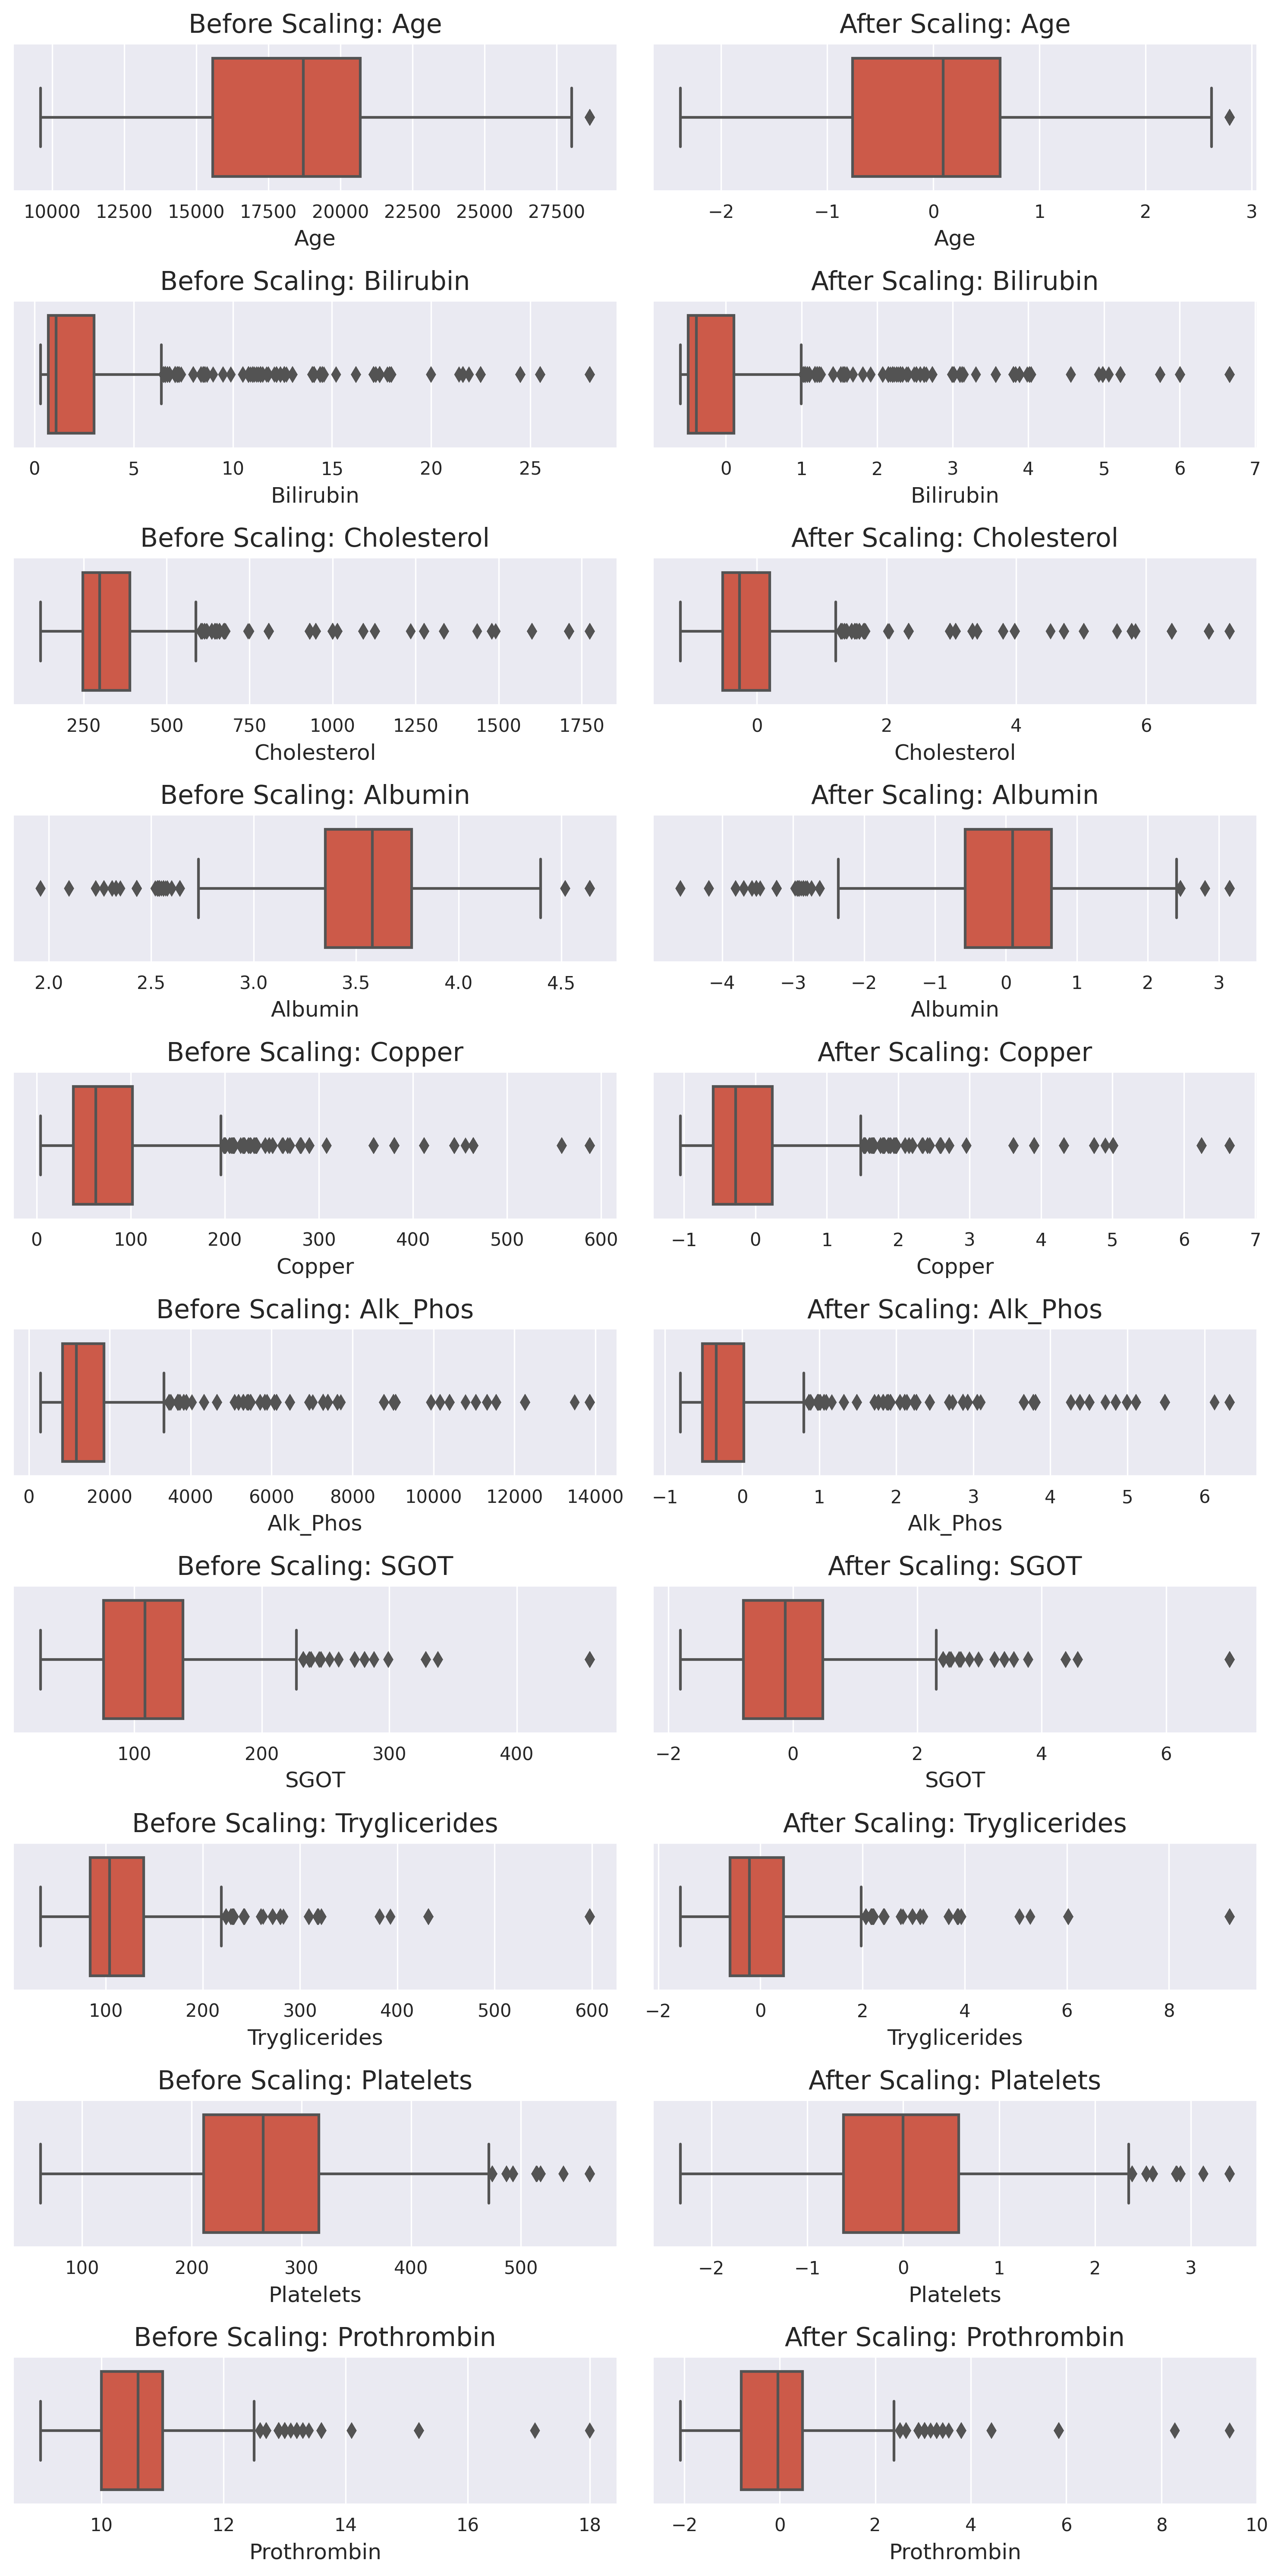

In [23]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 2 * n_rows), dpi=300)

# Plot box plots
for i, feature in enumerate(features_to_scale):
    # Before scaling
    sns.boxplot(x=train_data[feature], ax=axes[i, 0])
    axes[i, 0].set_title(f'Before Scaling: {feature}')
    
    # After scaling
    sns.boxplot(x=train_data_scaled[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f'After Scaling: {feature}')

# Adjust layout
plt.tight_layout()
plt.show()

In [24]:
train_data

id  N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  \
0        0     999     1  21532    1        0             0        0   
1        1    2574     0  19237    0        0             0        0   
2        2    3428     0  13727    0        0             1        1   
3        3    2576     0  18460    0        0             0        0   
4        4     788     0  16658    0        0             1        0   
...    ...     ...   ...    ...  ...      ...           ...      ...   
7900  7900    1166     1  16839    0        0             0        0   
7901  7901    1492     0  17031    0        0             1        0   
7902  7902    1576     1  25873    0        0             0        1   
7903  7903    3584     1  22960    1        0             1        0   
7904  7904    1978     1  19237    0        0             0        0   

      Bilirubin  Cholesterol  ...  Alk_Phos    SGOT  Tryglicerides  Platelets  \
0           2.3        316.0  ...    1601.0  179.80           63.0      394.0   
1           0.9        364.0  ...    1440.0  134.85           88.0      361.0   
2           3.3        299.0  ...    1029.0  119.35           50.0      199.0   
3           0.6        256.0  ...    1653.0   71.30           96.0      269.0   
4           1.1        346.0  ...    1181.0  125.55           96.0      298.0   
...         ...          ...  ...       ...     ...            ...        ...   
7900        0.8        309.0  ...    1629.0   79.05          224.0      344.0   
7901        0.9        260.0  ...    1440.0  142.00           78.0      277.0   
7902        2.0        225.0  ...     933.0   69.75           62.0      200.0   
7903        0.7        248.0  ...    1003.0   57.35          118.0      221.0   
7904        0.7        256.0  ...     645.0   74.40           85.0      336.0   

      Prothrombin  Stage  Status  Edema_N Edema_S  Edema_Y  
0             9.7    3.0       D        1       0        0  
1            11.0    3.0       C        1       0        0  
2            11.7    4.0       D        0       0        1  
3            10.7    3.0       C        1       0        0  
4            10.6    4.0       C        1       0        0  
...           ...    ...     ...      ...     ...      ...  
7900          9.9    2.0       C        1       0        0  
7901         10.0    4.0       C        1       0        0  
7902         12.7    2.0       D        0       1        0  
7903         10.6    4.0       D        1       0        0  
7904         10.3    3.0       C        1       0        0  

[7905 rows x 22 columns]

In [25]:
import pandas as pd

# Assuming train_data is your DataFrame

# Store the 'Status' column in a temporary variable
status = train_data_scaled['Status']

# Drop the 'Status' column from the original DataFrame
train_data_scaled = train_data_scaled.drop('Status', axis=1)

# Add the 'Status' column back, but now it will be at the end
train_data_scaled['Status'] = status

In [26]:
train_data_scaled

id  N_Days  Drug       Age  Sex  Ascites  Hepatomegaly  Spiders  \
0        0     999     1  0.858448    1        0             0        0   
1        1    2574     0  0.234760    0        0             0        0   
2        2    3428     0 -1.262634    0        0             1        1   
3        3    2576     0  0.023603    0        0             0        0   
4        4     788     0 -0.466107    0        0             1        0   
...    ...     ...   ...       ...  ...      ...           ...      ...   
7900  7900    1166     1 -0.416919    0        0             0        0   
7901  7901    1492     0 -0.364741    0        0             1        0   
7902  7902    1576     1  2.038155    0        0             0        1   
7903  7903    3584     1  1.246520    1        0             1        0   
7904  7904    1978     1  0.234760    0        0             0        0   

      Bilirubin  Cholesterol  ...  Alk_Phos      SGOT  Tryglicerides  \
0     -0.077237    -0.176908  ... -0.113334  1.336304      -0.996442   
1     -0.444429     0.068784  ... -0.197909  0.414968      -0.520497   
2      0.185043    -0.263923  ... -0.413812  0.097266      -1.243933   
3     -0.523113    -0.484022  ... -0.086017 -0.887610      -0.368194   
4     -0.391973    -0.023351  ... -0.333965  0.224347      -0.368194   
...         ...          ...  ...       ...       ...            ...   
7900  -0.470657    -0.212738  ... -0.098625 -0.728759       2.068644   
7901  -0.444429    -0.463548  ... -0.197909  0.561521      -0.710875   
7902  -0.155921    -0.642698  ... -0.464242 -0.919380      -1.015479   
7903  -0.496885    -0.524971  ... -0.427470 -1.173542       0.050637   
7904  -0.496885    -0.484022  ... -0.615532 -0.824070      -0.577610   

      Platelets  Prothrombin  Stage  Edema_N  Edema_S  Edema_Y  Status  
0      1.472341    -1.189049    3.0        1        0        0       D  
1      1.095026     0.474024    3.0        1        0        0       C  
2     -0.757248     1.369525    4.0        0        0        1       D  
3      0.043117     0.090238    3.0        1        0        0       C  
4      0.374697    -0.037691    4.0        1        0        0       C  
...         ...          ...    ...      ...      ...      ...     ...  
7900   0.900652    -0.933192    2.0        1        0        0       C  
7901   0.134588    -0.805263    4.0        1        0        0       C  
7902  -0.745814     2.648812    2.0        0        1        0       D  
7903  -0.505705    -0.037691    4.0        1        0        0       D  
7904   0.809181    -0.421477    3.0        1        0        0       C  

[7905 rows x 22 columns]

In [27]:
# Drop the 'id' column
train_data_scaled = train_data_scaled.drop('id', axis=1)

In [28]:
train_data_scaled

N_Days  Drug       Age  Sex  Ascites  Hepatomegaly  Spiders  Bilirubin  \
0        999     1  0.858448    1        0             0        0  -0.077237   
1       2574     0  0.234760    0        0             0        0  -0.444429   
2       3428     0 -1.262634    0        0             1        1   0.185043   
3       2576     0  0.023603    0        0             0        0  -0.523113   
4        788     0 -0.466107    0        0             1        0  -0.391973   
...      ...   ...       ...  ...      ...           ...      ...        ...   
7900    1166     1 -0.416919    0        0             0        0  -0.470657   
7901    1492     0 -0.364741    0        0             1        0  -0.444429   
7902    1576     1  2.038155    0        0             0        1  -0.155921   
7903    3584     1  1.246520    1        0             1        0  -0.496885   
7904    1978     1  0.234760    0        0             0        0  -0.496885   

      Cholesterol   Albumin  ...  Alk_Phos      SGOT  Tryglicerides  \
0       -0.176908 -0.572940  ... -0.113334  1.336304      -0.996442   
1        0.068784 -0.024043  ... -0.197909  0.414968      -0.520497   
2       -0.263923  0.004846  ... -0.413812  0.097266      -1.243933   
3       -0.484022 -0.139601  ... -0.086017 -0.887610      -0.368194   
4       -0.023351  0.293739  ... -0.333965  0.224347      -0.368194   
...           ...       ...  ...       ...       ...            ...   
7900    -0.212738  0.033735  ... -0.098625 -0.728759       2.068644   
7901    -0.463548 -0.341826  ... -0.197909  0.561521      -0.710875   
7902    -0.642698 -1.035169  ... -0.464242 -0.919380      -1.015479   
7903    -0.524971 -2.306298  ... -0.427470 -1.173542       0.050637   
7904    -0.484022 -0.919612  ... -0.615532 -0.824070      -0.577610   

      Platelets  Prothrombin  Stage  Edema_N  Edema_S  Edema_Y  Status  
0      1.472341    -1.189049    3.0        1        0        0       D  
1      1.095026     0.474024    3.0        1        0        0       C  
2     -0.757248     1.369525    4.0        0        0        1       D  
3      0.043117     0.090238    3.0        1        0        0       C  
4      0.374697    -0.037691    4.0        1        0        0       C  
...         ...          ...    ...      ...      ...      ...     ...  
7900   0.900652    -0.933192    2.0        1        0        0       C  
7901   0.134588    -0.805263    4.0        1        0        0       C  
7902  -0.745814     2.648812    2.0        0        1        0       D  
7903  -0.505705    -0.037691    4.0        1        0        0       D  
7904   0.809181    -0.421477    3.0        1        0        0       C  

[7905 rows x 21 columns]

In [29]:
from sklearn.model_selection import train_test_split

# Assuming 'Status' is your target variable
X = train_data_scaled.drop('Status', axis=1)  # Features
y = train_data_scaled['Status']  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42)  # Adjust test_size as needed

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier()

# Train the model on the training data
decision_tree.fit(X_train, y_train)

# Predict on the test data
y_pred = decision_tree.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           C       0.80      0.82      0.81       966
          CL       0.14      0.19      0.16        52
           D       0.70      0.64      0.67       563

    accuracy                           0.74      1581
   macro avg       0.55      0.55      0.55      1581
weighted avg       0.74      0.74      0.74      1581

Confusion Matrix:
 [[796  31 139]
 [ 24  10  18]
 [172  32 359]]


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the Decision Tree model
dt = DecisionTreeClassifier()

# Define a grid of hyperparameters
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Setup Grid Search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Perform grid search on the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] EN

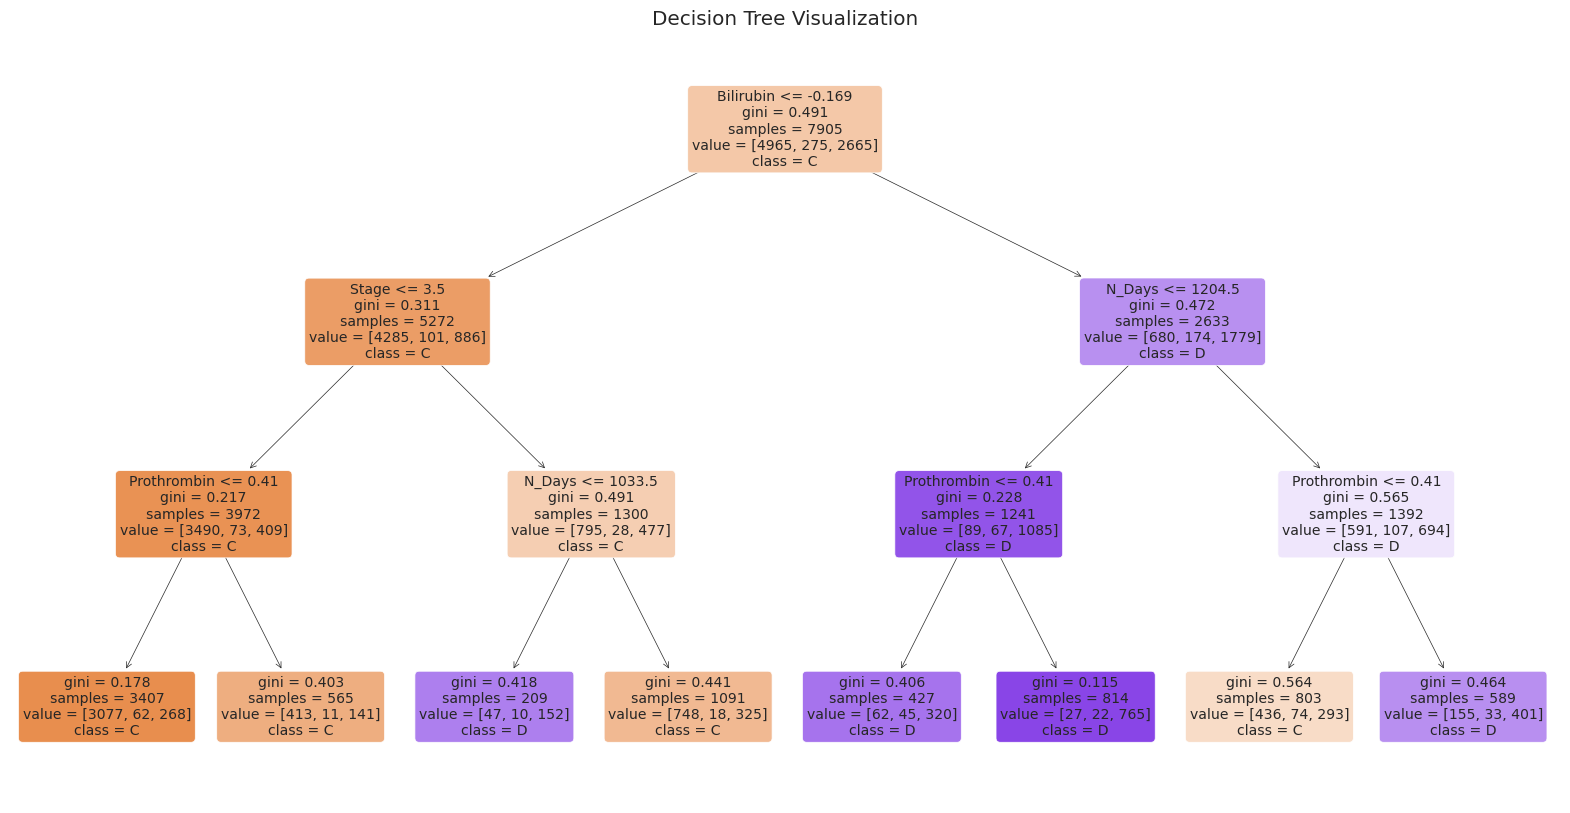

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming 'X' and 'y' are your training dataset and labels
# Replace this with your trained Decision Tree model
dt = DecisionTreeClassifier(max_depth=3)  # Limiting depth for visualization purposes
dt.fit(X, y)

# Plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=dt.classes_, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, log_loss

# Create a Logistic Regression model
# multi_class='multinomial' is used for multi-class classification
# 'lbfgs' solver is a good default choice
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)  # Increase max_iter if needed

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Predicted probabilities for evaluating log loss
y_pred_proba = logreg.predict_proba(X_test)

# Model Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Log Loss:", log_loss(y_test, y_pred_proba))

# You can also calculate other metrics such as accuracy, precision, recall, F1-score as needed

Classification Report:
               precision    recall  f1-score   support

           C       0.79      0.92      0.85       966
          CL       0.00      0.00      0.00        52
           D       0.79      0.65      0.72       563

    accuracy                           0.79      1581
   macro avg       0.53      0.52      0.52      1581
weighted avg       0.77      0.79      0.77      1581

Confusion Matrix:
 [[887   0  79]
 [ 35   0  17]
 [196   0 367]]
Log Loss: 0.5309603561974813


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Perform cross-validation
# cv=5 means 5 folds; adjust this as needed
# scoring='accuracy' means that we're focusing on the accuracy metric; you can change this as needed
scores = cross_val_score(logreg, X, y, cv=7, scoring='accuracy')

print("Cross-validated scores:", scores)
print("Average score:", scores.mean())

Cross-validated scores: [0.79026549 0.79380531 0.79539415 0.79096546 0.79007972 0.80248007
 0.79893711]
Average score: 0.7945610438065974


In [35]:
from sklearn.linear_model import LogisticRegression

# Assuming 'Status' is your target variable and train_data is your full training dataset
X = train_data_scaled.drop('Status', axis=1)  # Features
y = train_data_scaled['Status']  # Target

# Initialize the Logistic Regression model
# Use the best hyperparameters from your tuning (if applicable)
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the model on the full training dataset
logreg.fit(X, y)

# Now the model is trained on the full dataset and ready for making predictions on the test set

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [36]:
test_data

id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0      7905    3839  D-penicillamine  19724   F       N            Y       N   
1      7906    2468  D-penicillamine  14975   F       N            N       N   
2      7907      51          Placebo  13149   F       N            Y       N   
3      7908    2330  D-penicillamine  20510   F       N            N       N   
4      7909    1615  D-penicillamine  21904   F       N            Y       N   
...     ...     ...              ...    ...  ..     ...          ...     ...   
5266  13171    2870          Placebo  12279   F       N            N       N   
5267  13172    1770          Placebo  24803   F       N            N       N   
5268  13173    3707  D-penicillamine  16990   F       N            Y       N   
5269  13174    1216          Placebo  11773   F       N            N       N   
5270  13175    2272  D-penicillamine  21600   F       N            N       N   

     Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0        N        1.2        546.0     3.37    65.0    1636.0  151.90   
1        N        1.1        660.0     4.22    94.0    1257.0  151.90   
2        Y        2.0        151.0     2.96    46.0     961.0   69.75   
3        N        0.6        293.0     3.85    40.0     554.0  125.55   
4        N        1.4        277.0     2.97   121.0    1110.0  125.00   
...    ...        ...          ...      ...     ...       ...     ...   
5266     N        1.3        302.0     3.43    75.0    1345.0  145.00   
5267     N        0.5        219.0     4.09   121.0     663.0   79.05   
5268     N        0.8        315.0     4.09    13.0    1637.0  170.50   
5269     N        0.7        329.0     3.80    52.0     678.0   57.00   
5270     N        2.0        232.0     3.42    18.0    1636.0  170.50   

      Tryglicerides  Platelets  Prothrombin  Stage  
0              90.0      430.0         10.6    2.0  
1             155.0      227.0         10.0    2.0  
2             101.0      213.0         13.0    4.0  
3              56.0      270.0         10.6    2.0  
4             126.0      221.0          9.8    1.0  
...             ...        ...          ...    ...  
5266           44.0      181.0         10.6    3.0  
5267           94.0      311.0          9.7    3.0  
5268           70.0      426.0         10.9    3.0  
5269          126.0      306.0         10.2    1.0  
5270           83.0      213.0         13.6    2.0  

[5271 rows x 19 columns]

In [37]:
# Convert 'Drug' to binary format
# Assuming 'D-penicillamine' is the drug, map it to 1, and 'Placebo' to 0
test_data['Drug'] = test_data['Drug'].map({'D-penicillamine': 1, 'Placebo': 0})

# Convert binary features
test_data['Sex'] = test_data['Sex'].map({'M': 1, 'F': 0})
test_data['Ascites'] = test_data['Ascites'].map({'Y': 1, 'N': 0})
test_data['Hepatomegaly'] = test_data['Hepatomegaly'].map({'Y': 1, 'N': 0})
test_data['Spiders'] = test_data['Spiders'].map({'Y': 1, 'N': 0})


# Apply one-hot encoding to the 'Edema' column
edema_dummies = pd.get_dummies(test_data['Edema'], prefix='Edema')

# Concatenate the new columns to the original DataFrame
test_data = pd.concat([test_data, edema_dummies], axis=1)

# Optionally, drop the original 'Edema' column if no longer needed
test_data = test_data.drop('Edema', axis=1)

# Convert the True/False values to 1/0
test_data['Edema_N'] = test_data['Edema_N'].astype(int)
test_data['Edema_Y'] = test_data['Edema_Y'].astype(int)
test_data['Edema_S'] = test_data['Edema_S'].astype(int)
# Now, the columns 'Edema_N', 'Edema_Y', and 'Edema_S' will have values 1 or 0 instead of True or False.


features_to_scale = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# Apply scaling
scaler = StandardScaler() # or MinMaxScaler
test_data_scaled = test_data.copy()
test_data_scaled[features_to_scale] = scaler.fit_transform(test_data_scaled[features_to_scale])

In [38]:
test_data_scaled

id  N_Days  Drug       Age  Sex  Ascites  Hepatomegaly  Spiders  \
0      7905    3839     1  0.342186    0        0             1        0   
1      7906    2468     1 -0.983033    0        0             0        0   
2      7907      51     0 -1.492582    0        0             1        0   
3      7908    2330     1  0.561521    0        0             0        0   
4      7909    1615     1  0.950520    0        0             1        0   
...     ...     ...   ...       ...  ...      ...           ...      ...   
5266  13171    2870     0 -1.735358    0        0             0        0   
5267  13172    1770     0  1.759492    0        0             0        0   
5268  13173    3707     1 -0.420743    0        0             1        0   
5269  13174    1216     0 -1.876558    0        0             0        0   
5270  13175    2272     1  0.865688    0        0             0        0   

      Bilirubin  Cholesterol  ...    Copper  Alk_Phos      SGOT  \
0     -0.363546     0.965540  ... -0.254101 -0.090552  0.782524   
1     -0.389506     1.534346  ...  0.119925 -0.286401  0.782524   
2     -0.155863    -1.005321  ... -0.499153 -0.439359 -0.895372   
3     -0.519308    -0.296809  ... -0.576538 -0.649677  0.244331   
4     -0.311625    -0.376641  ...  0.468156 -0.362363  0.233097   
...         ...          ...  ...       ...       ...       ...   
5266  -0.337585    -0.251903  ... -0.125127 -0.240927  0.641593   
5267  -0.545268    -0.666034  ...  0.468156 -0.593351 -0.705421   
5268  -0.467387    -0.187039  ... -0.924769 -0.090035  1.162425   
5269  -0.493347    -0.117186  ... -0.421768 -0.585599 -1.155788   
5270  -0.155863    -0.601170  ... -0.860282 -0.090552  1.162425   

      Tryglicerides  Platelets  Prothrombin  Stage  Edema_N  Edema_S  Edema_Y  
0         -0.480744   1.895231    -0.041463    2.0        1        0        0  
1          0.755049  -0.422762    -0.798430    2.0        1        0        0  
2         -0.271610  -0.582624     2.986409    4.0        0        0        1  
3         -1.127159   0.068241    -0.041463    2.0        1        0        0  
4          0.203695  -0.491274    -1.050753    1.0        1        0        0  
...             ...        ...          ...    ...      ...      ...      ...  
5266      -1.355306  -0.948022    -0.041463    3.0        1        0        0  
5267      -0.404696   0.536407    -1.176914    3.0        1        0        0  
5268      -0.860989   1.849556     0.337021    3.0        1        0        0  
5269       0.203695   0.479314    -0.546108    1.0        1        0        0  
5270      -0.613830  -0.582624     3.743376    2.0        1        0        0  

[5271 rows x 21 columns]

In [39]:
# Save the 'id' column for later use in the submission file
test_ids = test_data_scaled['id'].copy()

# Drop the 'id' column from the test dataset before making predictions
test_data_scaled_without_id = test_data_scaled.drop('id', axis=1)
# Make predictions on the test data (probabilities)
test_probabilities = logreg.predict_proba(test_data_scaled_without_id)

# Prepare the submission file
submission_df = pd.DataFrame(test_ids)  # Use the saved 'id' column

# Add predicted probabilities for each class to the submission DataFrame
# Adjust the column names and order as per Kaggle's requirement
submission_df['Status_C'] = test_probabilities[:, 0]  # Probabilities for class 'C'
submission_df['Status_CL'] = test_probabilities[:, 1]  # Probabilities for class 'CL'
submission_df['Status_D'] = test_probabilities[:, 2]  # Probabilities for class 'D'

# Saving the DataFrame to a CSV file for submission
submission_file_path = '/kaggle/working/submission.csv'  # Adjust the path as necessary
submission_df.to_csv(submission_file_path, index=False)

print(f"Submission file saved to: {submission_file_path}")

Submission file saved to: /kaggle/working/submission.csv
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] E